In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import re

plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'

### Distribution of Age

In [2]:
age_counts = {
    '0 - 9 Years': 527_700,
    '10 - 19 Years': 1_367_283,
    '20 - 29 Years': 2_567_606,
    '30 - 39 Years': 2_198_860,
    '40 - 49 Years': 2_013_231,
    '50 - 59 Years': 1_945_338,
    '60 - 69 Years': 1_372_151,
    '70 - 79 Years': 762_250,
    '80+ Years': 579_595,
    'Unknown': 81_756,
    'None': 66
}

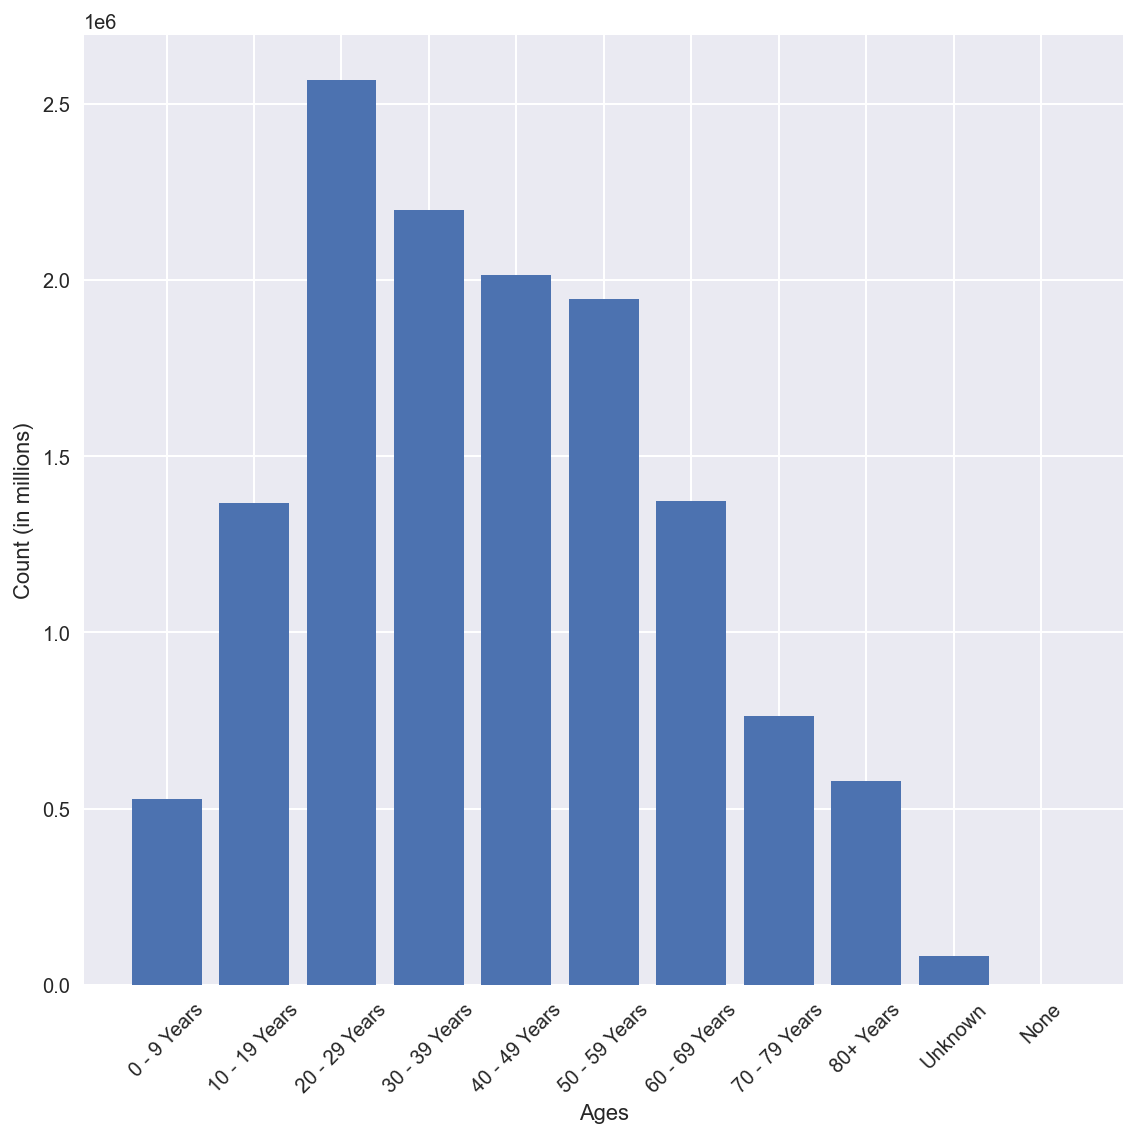

In [3]:
fig, ax = plt.subplots(figsize=(8,8))

keys = list(age_counts.keys())
vals = list(age_counts.values())

ax.bar(keys, vals)

ax.set_xlabel('Ages')
ax.set_ylabel('Count (in millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Distribution of Sex

In [4]:
sex_counts = {
    'Male': 6328300,
    'Female': 6920504,
    'Other': 260,
    'Unknown': 129047,
    'Missing': 37713,
    'None': 12
}

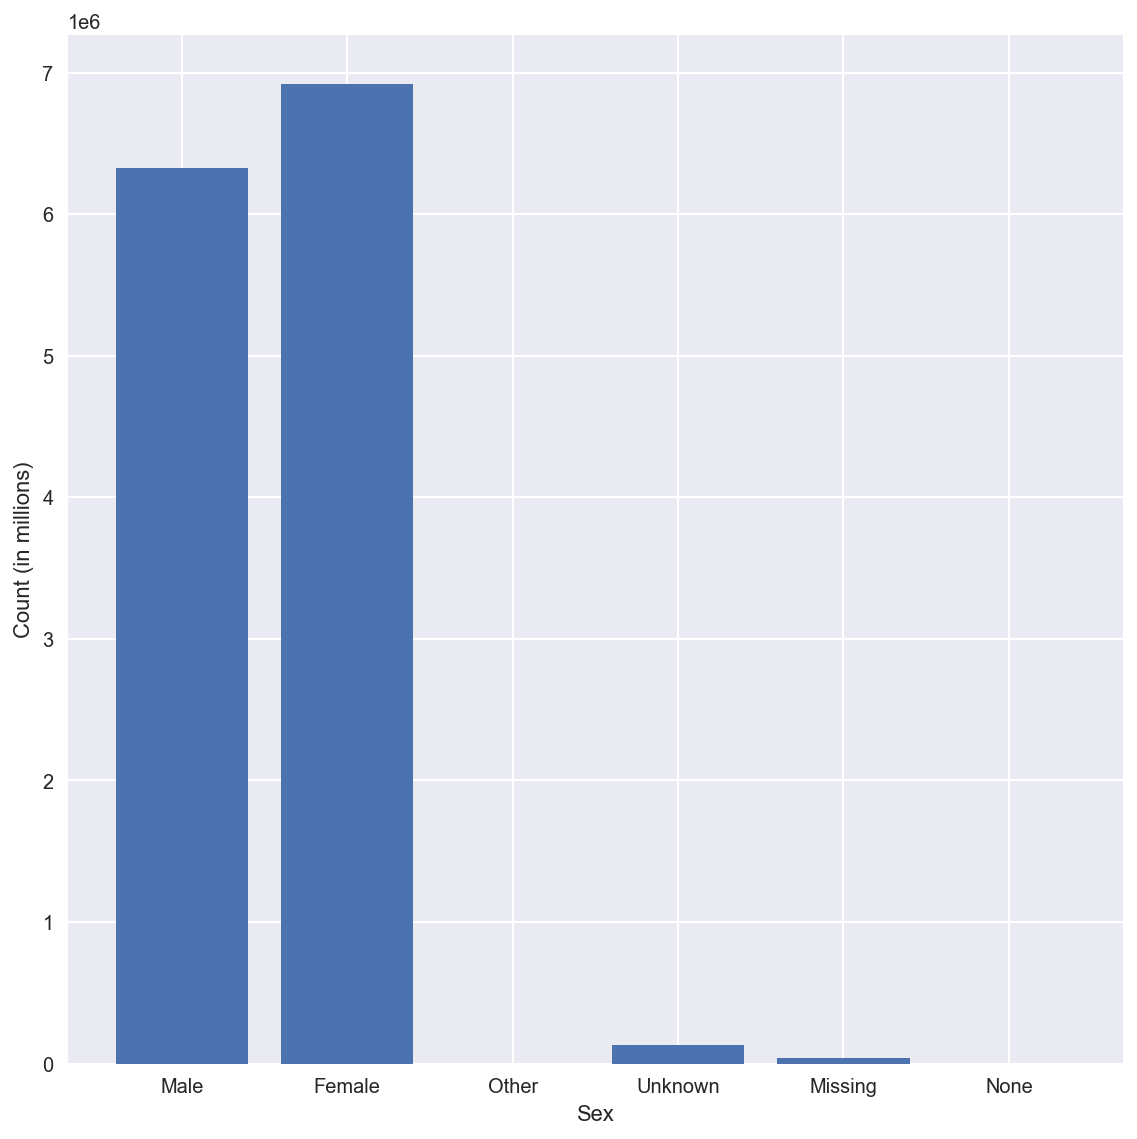

In [5]:
fig, ax = plt.subplots(figsize=(8,8))

keys = list(sex_counts.keys())
vals = list(sex_counts.values())

ax.bar(keys, vals)

ax.set_xlabel('Sex')
ax.set_ylabel('Count (in millions)')

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Race & Ethnicity

In [6]:
race_counts = {
    'White, Non-Hispanic': 4_200_325,
    'Hispanic/Latino': 1_580_091,
    'Black, Non-Hispanic': 983_879,
    'Multiple/Other, Non-Hispanic': 478_992,
    'Asian, Non-Hispanic': 246_432,
    'American Indian/Alaska Native, Non-Hispanic': 98_864,
    'Native Hawaiian/Other Pacific Islander, Non-Hispanic': 26_195,
    'Unknown': 5_175_054,
    'Missing': 625_992,
    'None': 12
}

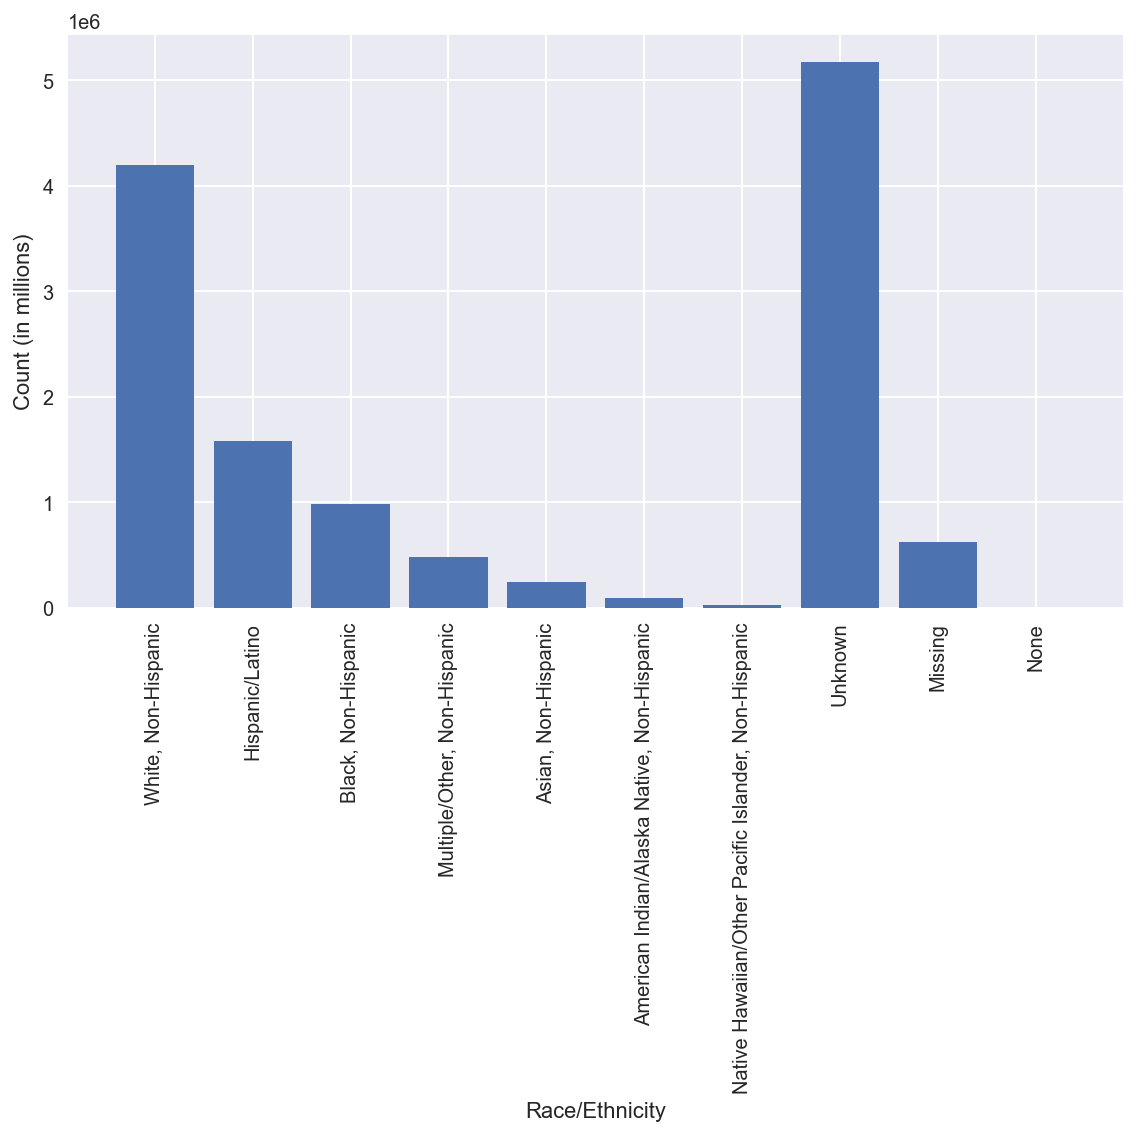

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

keys = list(race_counts.keys())
vals = list(race_counts.values())

ax.bar(keys, vals)

ax.set_xlabel('Race/Ethnicity')
ax.set_ylabel('Count (in millions)')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Time Series of COVID onset
##### (date of first positive specimen collection)

In [60]:
time_data = [('2020/01/10', 1), ('2020/02/18', 1), ('2020/11/01', 10639), ('2020/05/04', 12842), ('2020/01/11', 3), ('2020/11/06', 32129), ('2020/04/01', 14998), ('2020/10/01', 11211), ('2020/11/07', 19617), ('2020/04/02', 15003), ('2020/11/04', 31060), ('2020/04/03', 15519), ('2020/10/03', 6120), ('2020/01/14', 1), ('2020/11/05', 32942), ('2020/10/02', 11116), ('2020/10/05', 15935), ('2020/08/31', 10931), ('2020/01/16', 1), ('2020/02/11', 1), ('2020/01/17', 2), ('2020/08/30', 3642), ('2020/10/04', 5188), ('2020/02/10', 1), ('2020/10/07', 13412), ('2020/10/06', 13681), ('2020/06/15', 8797), ('2020/10/09', 12643), ('2020/11/30', 75507), ('2020/09/29', 11508), ('2020/02/12', 4), ('2020/06/14', 2583), ('2020/02/15', 2), ('2020/09/28', 13094), ('2020/10/08', 13481), ('2020/06/17', 8950), ('2020/06/16', 8618), ('2020/09/25', 9400), ('2020/04/30', 12804), ('2020/06/11', 7180), ('2020/02/16', 3), ('2020/12/25', 122), ('2020/09/24', 10369), ('2020/06/10', 7615), ('2020/12/24', 567), ('2020/09/27', 4405), ('2020/03/30', 16447), ('2020/06/13', 3481), ('2020/12/27', 85), ('2020/09/26', 5122), ('2020/03/31', 14874), ('2020/06/12', 7292), ('2020/05/14', 10307), ('2020/09/21', 12385), ('2020/12/26', 335), ('2020/07/09', 13496), ('2020/10/12', 16985), ('2020/12/21', 3573), ('2020/08/26', 10138), ('2020/05/15', 9789), ('2020/02/09', 3), ('2020/07/08', 15451), ('2020/09/20', 3742), ('2020/08/27', 9265), ('2020/05/16', 4646), ('2020/12/20', 1956), ('2020/09/23', 10448), ('2020/10/13', 15662), ('2020/08/24', 11645), ('2020/05/17', 3396), ('2020/10/10', 6615), ('2020/12/23', 1220), ('2020/09/22', 10705), ('2020/10/11', 5588), ('2020/12/22', 1993), ('2020/08/25', 10455), ('2020/05/10', 3116), ('2020/07/05', 4807), ('2020/06/19', 8476), ('2020/10/16', 13461), ('2020/10/29', 20996), ('2020/08/22', 4567), ('2020/05/11', 11183), ('2020/07/04', 3195), ('2020/06/18', 8732), ('2020/04/28', 15132), ('2020/10/17', 7458), ('2020/10/28', 20963), ('2020/08/23', 3703), ('2020/05/12', 10865), ('2020/02/02', 2), ('2020/07/07', 15412), ('2020/04/29', 13972), ('2020/10/14', 15165), ('2020/08/20', 9459), ('2020/05/13', 10634), ('2020/02/03', 1), ('2020/07/06', 15638), ('2020/01/24', 1), ('2020/08/21', 8773), ('2020/07/01', 12450), ('2020/10/15', 14804), ('2020/06/06', 3397), ('2020/01/27', 1), ('2020/02/01', 2), ('2020/12/29', 4), ('2020/08/19', 9519), ('2020/01/26', 2), ('2020/08/18', 10743), ('2020/12/28', 43), ('2020/06/07', 2420), ('2020/11/28', 32547), ('2020/02/06', 2), ('2020/07/03', 7238), ('2020/03/01', 20), ('2020/01/21', 2), ('2020/08/17', 11508), ('2020/10/18', 6405), ('2020/06/04', 7882), ('2020/11/29', 27258), ('2020/10/23', 16946), ('2020/02/07', 1), ('2020/07/02', 12165), ('2020/01/20', 1), ('2020/04/22', 14094), ('2020/08/16', 3335), ('2020/10/19', 19394), ('2020/06/05', 7619), ('2020/10/22', 17459), ('2020/05/18', 11720), ('2020/02/04', 2), ('2020/03/03', 47), ('2020/01/23', 7), ('2020/04/23', 12886), ('2020/08/15', 4838), ('2020/06/02', 8086), ('2020/10/21', 17811), ('2020/05/19', 10812), ('2020/03/02', 37), ('2020/01/22', 3), ('2020/04/20', 15023), ('2020/08/14', 9518), ('2020/06/03', 8171), ('2020/11/24', 51303), ('2020/10/20', 17634), ('2020/03/05', 94), ('2020/04/21', 12503), ('2020/08/13', 9504), ('2020/11/25', 47380), ('2020/10/27', 20678), ('2020/08/28', 9690), ('2020/03/04', 79), ('2020/04/26', 5933), ('2020/08/12', 10454), ('2020/06/01', 8465), ('2020/11/26', 8208), ('2020/10/26', 23484), ('2020/08/29', 4201), ('2020/03/07', 145), ('2020/04/27', 13293), ('2020/08/11', 10464), ('2020/05/21', 10452), ('2020/11/27', 43189), ('2020/10/25', 7795), ('2020/03/06', 126), ('2020/04/24', 13057), ('2020/08/10', 11941), ('2020/05/20', 10589), ('2020/11/20', 43776), ('2020/10/24', 9505), ('2020/03/09', 257), ('2020/01/29', 5), ('2020/04/25', 8376), ('2020/05/23', 4246), ('2020/07/18', 6243), ('2020/11/21', 24055), ('2020/09/30', 11257), ('2020/08/08', 4741), ('2020/03/08', 163), ('2020/01/28', 1), ('2020/05/22', 9291), ('2020/07/19', 4440), ('2020/11/22', 20841), ('2020/07/16', 12947), ('2020/08/09', 3527), ('2020/05/25', 3641), ('2020/11/23', 59930), ('2020/04/13', 11367), ('2020/07/17', 12222), ('2020/05/24', 3647), ('2020/12/09', 50361), ('2020/04/12', 6764), ('2020/09/07', 3782), ('2020/11/19', 43033), ('2020/05/27', 9032), ('2020/12/08', 55311), ('2020/07/14', 14476), ('2020/06/08', 8739), ('2020/04/11', 9441), ('2020/11/18', 44484), ('2020/09/06', 3368), ('2020/05/26', 10838), ('2020/12/07', 65773), ('2020/07/15', 13849), ('2020/06/09', 7991), ('2020/05/29', 7759), ('2020/12/06', 24348), ('2020/09/05', 3767), ('2020/04/10', 12952), ('2020/07/12', 5080), ('2020/04/17', 13505), ('2020/06/30', 12795), ('2020/09/04', 8213), ('2020/05/28', 8097), ('2020/12/05', 28956), ('2020/07/13', 15180), ('2020/12/04', 53076), ('2020/09/03', 9200), ('2020/04/16', 13479), ('2020/07/10', 13266), ('2020/06/28', 4701), ('2020/03/12', 1045), ('2020/04/15', 14287), ('2020/09/02', 10257), ('2020/12/03', 55227), ('2020/07/11', 7155), ('2020/06/29', 13194), ('2020/03/13', 1632), ('2020/08/01', 4919), ('2020/04/14', 14595), ('2020/09/01', 9609), ('2020/12/02', 57268), ('2020/08/02', 3899), ('2020/03/10', 342), ('2020/12/01', 62629), ('2020/07/27', 13730), ('2020/03/11', 589), ('2020/08/03', 12754), ('2020/11/11', 37111), ('2020/01/31', 1), ('2020/03/16', 4657), ('2020/04/19', 7050), ('2020/08/04', 10573), ('2020/07/26', 4058), ('2020/03/29', 8471), ('2020/01/09', 2), ('2020/11/10', 41635), ('2020/03/17', 5882), ('2020/04/18', 7847), ('2020/08/05', 10541), ('2020/12/18', 7862), ('2020/07/25', 5477), ('2020/03/28', 8782), ('2020/01/08', 1), ('2020/11/13', 39475), ('2020/03/14', 1552), ('2020/08/06', 10045), ('2020/12/19', 3314), ('2020/07/24', 10922), ('2020/01/07', 1), ('2020/11/12', 40669), ('2020/07/23', 11587), ('2020/08/07', 9493), ('2020/11/15', 19408), ('2020/03/15', 2107), ('2020/06/20', 4320), ('2020/05/30', 3817), ('2020/11/14', 22928), ('2020/07/22', 12567), ('2020/06/21', 3219), ('2020/05/31', 2536), ('2020/02/28', 13), ('2020/11/17', 46678), ('2020/07/21', 13410), ('2020/01/04', 1), ('2020/09/09', 9677), ('2020/05/09', 4732), ('2020/03/18', 7176), ('2020/02/29', 20), ('2020/07/20', 14148), ('2020/03/23', 9768), ('2020/11/16', 53118), ('2020/01/03', 1), ('2020/06/22', 11005), ('2020/09/08', 11388), ('2020/05/08', 10025), ('2020/03/22', 5677), ('2020/03/19', 8434), ('2020/06/23', 10672), ('2020/01/02', 1), ('None', 9263145), ('2020/10/30', 21157), ('2020/06/24', 10573), ('2020/09/10', 9144), ('2020/03/21', 5890), ('2020/01/01', 3), ('2020/10/31', 11536), ('2020/06/25', 10481), ('2020/09/11', 8363), ('2020/02/24', 3), ('2020/03/20', 8723), ('2020/12/10', 49294), ('2020/09/12', 4103), ('2020/06/26', 10705), ('2020/11/08', 16696), ('2020/02/25', 1), ('2020/12/11', 46333), ('2020/03/27', 12992), ('2020/04/08', 15738), ('2020/06/27', 5674), ('2020/01/18', 1), ('2020/11/09', 46816), ('2020/02/26', 4), ('2020/12/12', 25881), ('2020/03/26', 12877), ('2020/09/13', 3635), ('2020/12/13', 21655), ('2020/04/09', 14106), ('2020/05/03', 4460), ('2020/01/19', 1), ('2020/09/14', 11363), ('2020/02/27', 5), ('2020/03/25', 12155), ('2020/05/02', 5800), ('2020/09/15', 9960), ('2020/12/14', 58754), ('2020/02/20', 2), ('2020/07/29', 11244), ('2020/03/24', 11050), ('2020/02/21', 5), ('2020/05/01', 12819), ('2020/12/15', 50036), ('2020/09/16', 9693), ('2020/07/28', 11899), ('2020/04/04', 10496), ('2020/02/22', 3), ('2020/12/16', 40719), ('2020/09/17', 9219), ('2020/04/05', 9610), ('2020/05/07', 11595), ('2020/07/30', 11208), ('2020/09/18', 8936), ('2020/11/02', 30740), ('2020/02/23', 2), ('2020/12/17', 9761), ('2020/07/31', 10450), ('2020/04/06', 18084), ('2020/09/19', 4526), ('2020/05/06', 12286), ('2020/11/03', 27953), ('2020/04/07', 16938), ('2020/05/05', 12115)]

time_data = time_data[:290] + time_data[291:]

In [63]:
#count = [elem[1] for elem in time_data]

dates_list = []

pattern = re.compile(r'([0-9]{4})/([0-9]{2})/([0-9]{2})')

for elem in time_data:
    result = re.findall(pattern, elem[0])
    temp_date = datetime.date(int(result[0][0]), int(result[0][1]), int(result[0][2]))
    dates_list.append((temp_date, elem[1]))

In [68]:
dates_list_sorted = sorted(dates_list)

In [69]:
dates_list_sorted[:10]

[(datetime.date(2020, 1, 1), 3),
 (datetime.date(2020, 1, 2), 1),
 (datetime.date(2020, 1, 3), 1),
 (datetime.date(2020, 1, 4), 1),
 (datetime.date(2020, 1, 7), 1),
 (datetime.date(2020, 1, 8), 1),
 (datetime.date(2020, 1, 9), 2),
 (datetime.date(2020, 1, 10), 1),
 (datetime.date(2020, 1, 11), 3),
 (datetime.date(2020, 1, 14), 1)]

In [70]:
dates = [elem[0] for elem in dates_list_sorted]
count = [elem[1] for elem in dates_list_sorted]

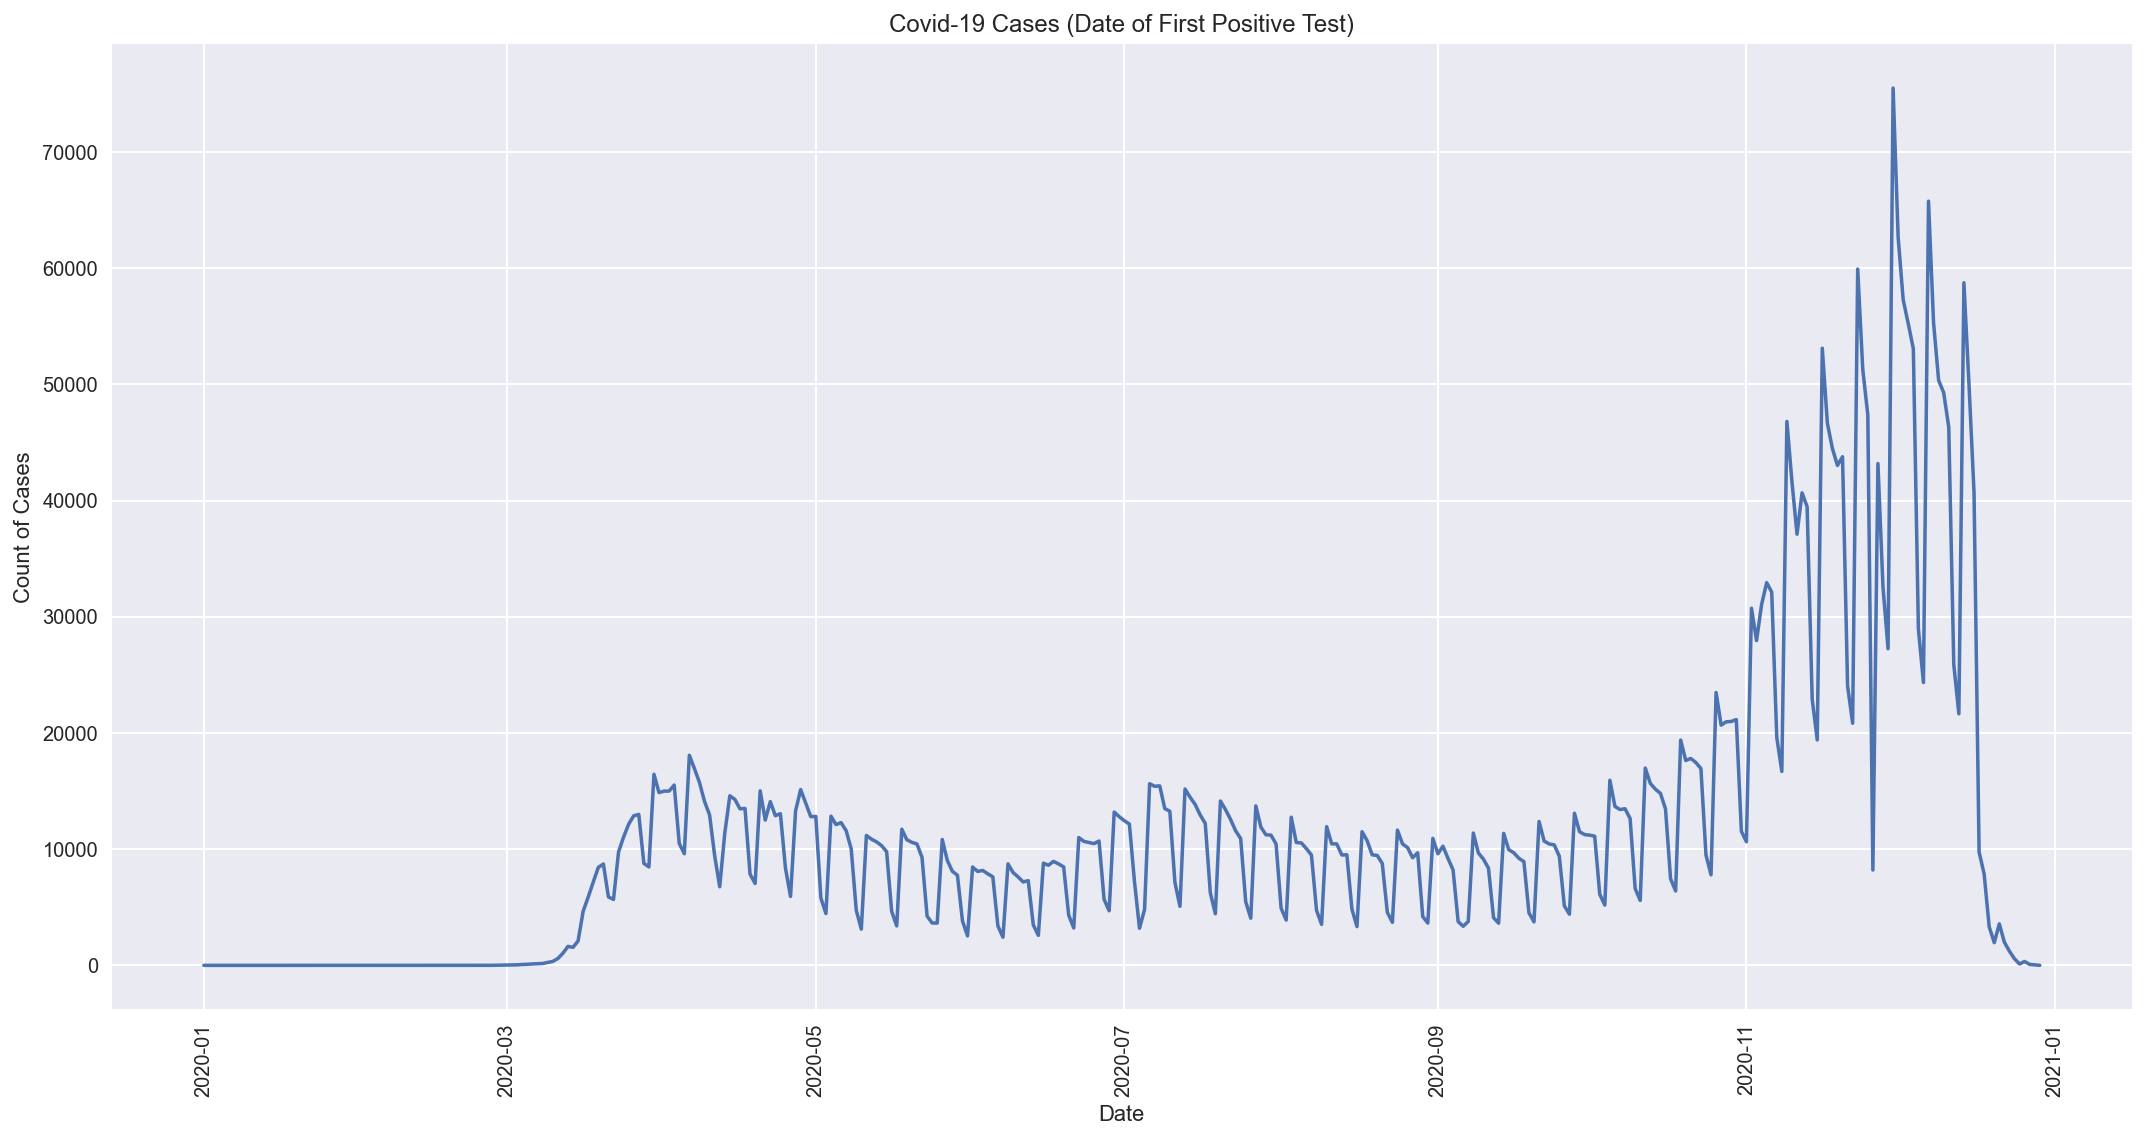

In [74]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot_date(dates, count, fmt='-')

ax.set_title('Covid-19 Cases (Date of First Positive Test)')
ax.set_xlabel('Date')
ax.set_ylabel('Count of Cases')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()